In [636]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [637]:
# Read the CSV file into a pandas dataframe
df=pd.read_csv(r"C:\Users\silam\Copper_Set.xlsx.csv")
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [638]:
#Dealing with data in wrong format for categorical variables this step is ignored
df['item_date']=pd.to_datetime(df['item_date'],format="%Y%m%d",errors='coerce').dt.date
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['delivery date']=pd.to_datetime(df['delivery date'],format="%Y%m%d",errors='coerce').dt.date
df['quantity tons']=pd.to_numeric(df['quantity tons'],errors='coerce')
df['customer']=pd.to_numeric(df['customer'],errors='coerce')
df['country']=pd.to_numeric(df['country'],errors='coerce')
df['application']=pd.to_numeric(df['application'],errors='coerce')
df['thickness']=pd.to_numeric(df['thickness'],errors='coerce')
df['width']=pd.to_numeric(df['width'],errors='coerce')
df['product_ref']=pd.to_numeric(df['product_ref'],errors='coerce')
df['selling_price']=pd.to_numeric(df['selling_price'],errors='coerce')

In [639]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [640]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [641]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [642]:
df['material_ref'].fillna('unknown',inplace=True)
df=df.dropna()

In [643]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [644]:
df_1=df.copy()

In [645]:
a=df_1['quantity tons']<=0
df_1.loc[a,'quantity tons']=np.nan

b=df_1['thickness']<=0
df_1.loc[b,'thickness']=np.nan

b=df_1['selling_price']<=0
df_1.loc[b,'selling_price']=np.nan

In [646]:
df_1.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [647]:
df_1=df_1.dropna()

In [648]:
df_1.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [649]:
df_1['selling_price_log']=np.log(df_1['selling_price'])
df_1['quantity_tons_log']=np.log(df_1['quantity tons'])
df_1['thickness_log']=np.log(df_1['thickness'])

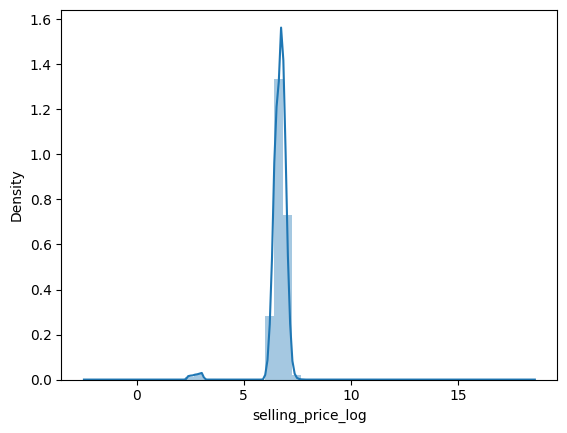

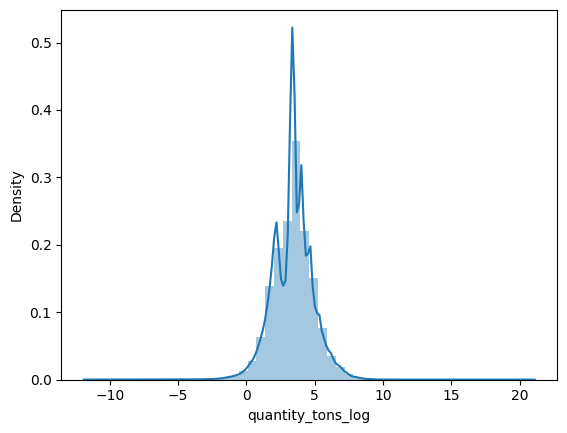

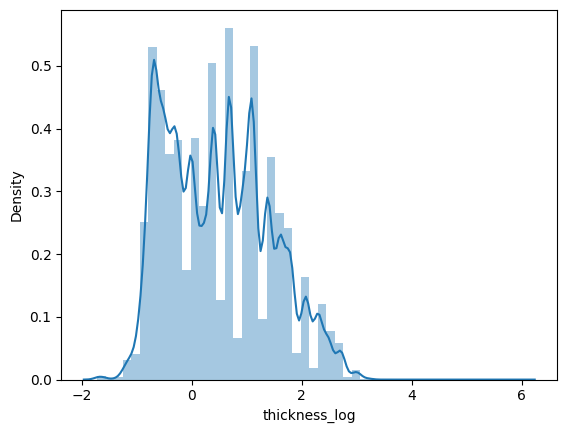

In [650]:
sns.distplot(df_1['selling_price_log'])
plt.show()
sns.distplot(df_1['quantity_tons_log'])
plt.show()
sns.distplot(df_1['thickness_log'])
plt.show()

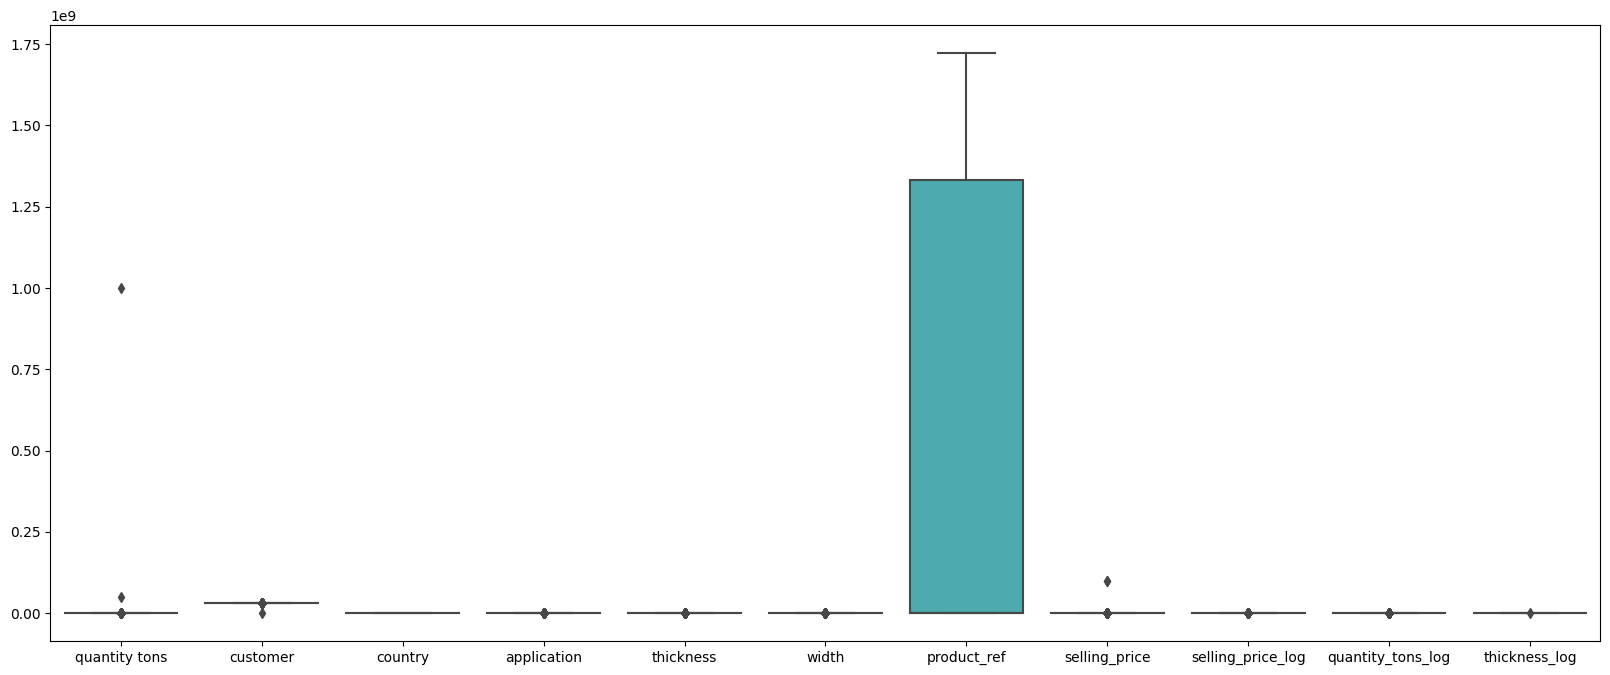

In [651]:
#Deduction of outliers
plt.figure(figsize=(20,8))
sns.boxplot(data=df_1,width=0.8)
plt.show()

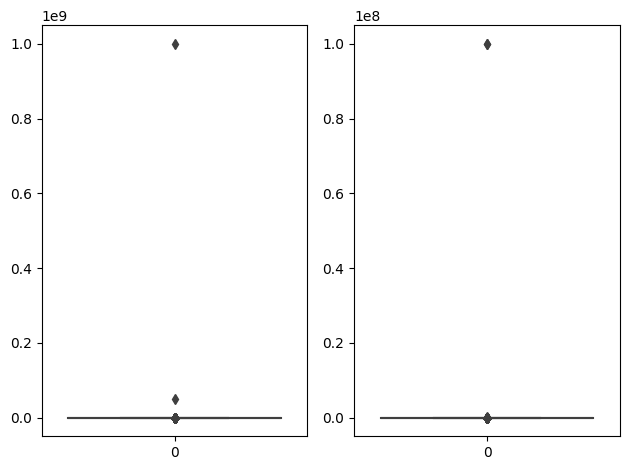

In [652]:
plt.subplot(1,2,1)
sns.boxplot(data=df_1['quantity tons'],width=0.8)
plt.subplot(1,2,2)
sns.boxplot(data=df_1['selling_price'],width=0.8)
plt.tight_layout()
plt.show()

In [653]:
df_1.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,selling_price_log,quantity_tons_log,thickness_log
count,1.816200e+05,1.816200e+05,181620.000000,181620.000000,181620.000000,181620.000000,1.816200e+05,1.816200e+05,181620.000000,181620.000000,181620.000000
mean,5.876596e+03,3.023251e+07,44.894009,25.615571,2.550501,1295.269480,4.740204e+08,1.918487e+03,6.626299,3.392019,0.480172
std,2.349418e+06,1.005651e+05,24.404547,17.753855,2.976518,261.650874,7.175358e+08,3.318431e+05,0.564058,1.444974,0.933528
min,1.000000e-05,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,1.000000e-01,-2.302585,-11.512925,-1.714798
25%,1.096871e+01,3.019688e+07,26.000000,10.000000,0.700000,1179.750000,6.119930e+05,6.690000e+02,6.505784,2.395046,-0.356675
50%,3.036409e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02,6.699500,3.413261,0.405465
75%,6.716332e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02,6.859615,4.207127,1.098612
max,1.000000e+09,3.040818e+07,113.000000,99.000000,400.000000,2990.000000,1.722208e+09,1.000010e+08,18.420691,20.723266,5.991465


In [654]:
print(np.percentile(df_1['quantity tons'],99.1))
print(np.percentile(df_1['quantity tons'],99.2))
print(np.percentile(df_1['quantity tons'],99.3))
print(np.percentile(df_1['quantity tons'],99.4))
print(np.percentile(df_1['quantity tons'],99.5))
print(np.percentile(df_1['quantity tons'],99.6))
print(np.percentile(df_1['quantity tons'],99.7))
print(np.percentile(df_1['quantity tons'],99.8))
print(np.percentile(df_1['quantity tons'],99.9))
print(np.percentile(df_1['quantity tons'],100))

1215.142581482003
1316.741778152002
1461.6806040009678
1550.5082807620088
1767.8017327849984
2006.585464020002
2506.371653978002
3207.6683439119984
4894.557015787225
1000000000.0


In [655]:
print(np.percentile(df_1['selling_price'],99.1))
print(np.percentile(df_1['selling_price'],99.2))
print(np.percentile(df_1['selling_price'],99.3))
print(np.percentile(df_1['selling_price'],99.4))
print(np.percentile(df_1['selling_price'],99.5))
print(np.percentile(df_1['selling_price'],99.6))
print(np.percentile(df_1['selling_price'],99.7))
print(np.percentile(df_1['selling_price'],99.8))
print(np.percentile(df_1['selling_price'],99.9))
print(np.percentile(df_1['selling_price'],100))

1385.0
1398.0
1415.3268299999936
1441.0
1467.0
1501.524000000005
1542.0
1588.8357799999917
1698.0
100001015.0


In [656]:
#Outliers Handaling
p_05 = df_1['selling_price'].quantile(0.05) # 5th quantile
p_999 = df_1['selling_price'].quantile(0.999) # 99.9th quantile

df_1['selling_price'].clip(p_05, p_999, inplace=True)

In [657]:
p_05 = df_1['quantity tons'].quantile(0.05) # 5th quantile
p_999 = df_1['quantity tons'].quantile(0.999) # 99.9th quantile

df_1['quantity tons'].clip(p_05, p_999, inplace=True)

In [658]:
print(np.percentile(df_1['thickness'],99.1))
print(np.percentile(df_1['thickness'],99.2))
print(np.percentile(df_1['thickness'],99.3))
print(np.percentile(df_1['thickness'],99.4))
print(np.percentile(df_1['thickness'],99.5))
print(np.percentile(df_1['thickness'],99.6))
print(np.percentile(df_1['thickness'],99.7))
print(np.percentile(df_1['thickness'],99.8))
print(np.percentile(df_1['thickness'],99.9))
print(np.percentile(df_1['thickness'],100))

15.0
15.0
15.0
15.0
15.0
15.0
16.0
20.0
20.0
400.0


In [659]:
p_05 = df_1['thickness'].quantile(0.05) # 5th quantile
p_999 = df_1['thickness'].quantile(0.999) # 99.9th quantile

df_1['thickness'].clip(p_05, p_999, inplace=True)

In [660]:
df_1.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,selling_price_log,quantity_tons_log,thickness_log
count,181620.000000,1.816200e+05,181620.000000,181620.000000,181620.000000,181620.000000,1.816200e+05,181620.000000,181620.000000,181620.000000,181620.000000
mean,91.112231,3.023251e+07,44.894009,25.615571,2.549196,1295.269480,4.740204e+08,826.349623,6.626299,3.392019,0.480172
std,279.059391,1.005651e+05,24.404547,17.753855,2.813705,261.650874,7.175358e+08,200.516907,0.564058,1.444974,0.933528
min,2.892097,1.245800e+04,25.000000,2.000000,0.450000,1.000000,6.117280e+05,521.000000,-2.302585,-11.512925,-1.714798
25%,10.968706,3.019688e+07,26.000000,10.000000,0.700000,1179.750000,6.119930e+05,669.000000,6.505784,2.395046,-0.356675
50%,30.364095,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,812.000000,6.699500,3.413261,0.405465
75%,67.163321,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,953.000000,6.859615,4.207127,1.098612
max,4894.557016,3.040818e+07,113.000000,99.000000,20.000000,2990.000000,1.722208e+09,1698.000000,18.420691,20.723266,5.991465


In [ ]:
#DECISION TREE REGRESSOR
#1 Encode categorical features
#2 Test and Train split
#3 Define Hyperparameters for GridSearchCV
#4 Train the DecisionTreeRegressor with best parameters
#5 Evalution metrics
#6 Predict the selling price for new values
#7 Save the DecisionTreeRegressor model

In [661]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler,LabelBinarizer
from sklearn.model_selection import train_test_split

In [662]:
x=df_1[['quantity_tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df_1['selling_price_log']

In [663]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(x[['item type']])
x_ohe = ohe.fit_transform(x[['item type']]).toarray()
x_be = ohe.fit_transform(x[['status']]).toarray()
# independent features after encoding
x = np.concatenate((x[['quantity_tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, x_ohe, x_be), axis=1)


In [664]:
X=df_1[['quantity_tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()


In [665]:
X.corr()

,quantity_tons_log,application,thickness_log,width,selling_price_log,country,customer,product_ref
quantity_tons_log,1.000000,0.026470,-0.099483,-0.128144,-0.088082,-0.336766,-0.045384,-0.007129
application,0.026470,1.000000,-0.557527,-0.539567,0.038193,-0.075403,-0.108172,-0.350521
thickness_log,-0.099483,-0.557527,1.000000,0.593963,-0.468711,-0.259646,-0.045425,0.325403
width,-0.128144,-0.539567,0.593963,1.000000,-0.331638,-0.022864,-0.059080,-0.103858
selling_price_log,-0.088082,0.038193,-0.468711,-0.331638,1.000000,-0.138868,-0.143287,-0.128804
country,-0.336766,-0.075403,-0.259646,-0.022864,-0.138868,1.000000,0.041174,-0.421556
customer,-0.045384,-0.108172,-0.045425,-0.059080,-0.143287,0.041174,1.000000,-0.229392
product_ref,-0.007129,-0.350521,0.325403,-0.103858,-0.128804,-0.421556,-0.229392,1.000000


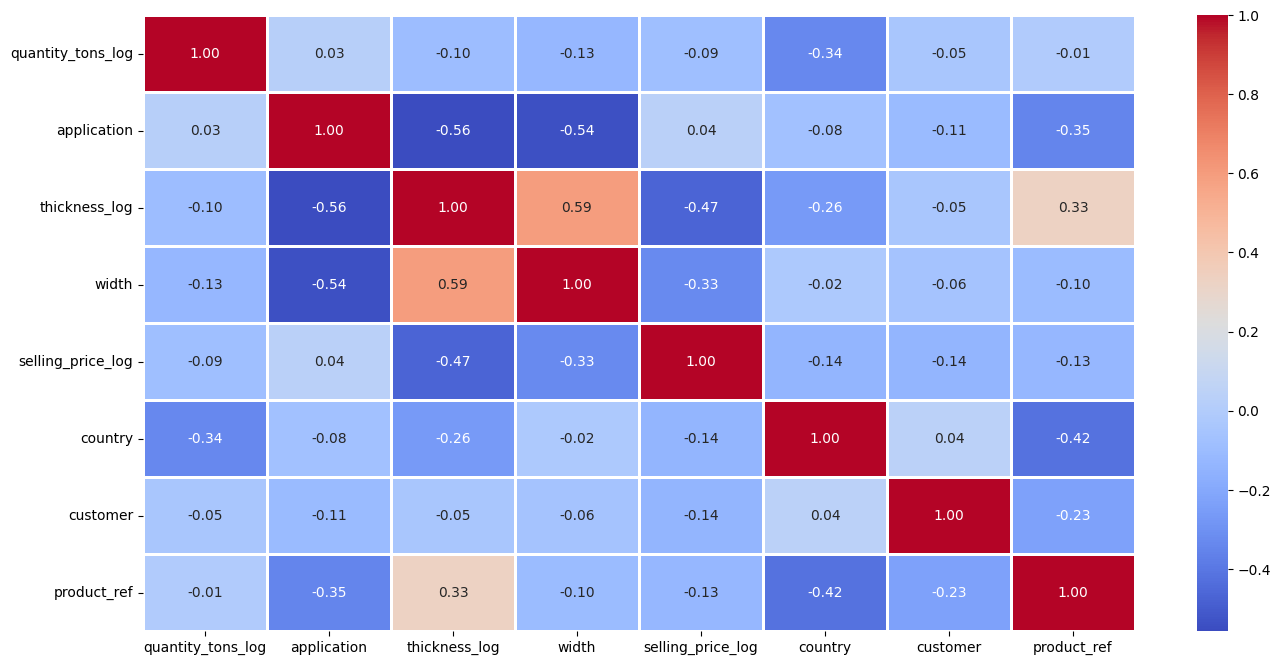

In [666]:
fig,ax=plt.subplots(figsize=(16,8))
sns.heatmap(X.corr(),annot=True,fmt='1.2f',annot_kws={'size':10},linewidth=1,cmap='coolwarm')
plt.show()

In [667]:

ss=StandardScaler()
ss.fit_transform(x)

array([[ 0.41506739, -0.87956189,  0.22814024, ..., -0.15323927,
         0.75215932, -0.00234649],
       [ 2.25042993,  0.8665426 , -0.75339772, ..., -0.15323927,
         0.75215932, -0.00234649],
       [ 1.77453529,  0.13430523, -1.55084831, ..., -0.15323927,
         0.75215932, -0.00234649],
       ...,
       [ 1.34669579,  0.8665426 , -0.56931035, ..., -0.15323927,
         0.75215932, -0.00234649],
       [-1.34846834,  0.8665426 , -0.88124292, ..., -0.15323927,
         0.75215932, -0.00234649],
       [ 1.81043496,  0.8665426 , -0.88124292, ..., -0.15323927,
         0.75215932, -0.00234649]])

In [668]:
x=df_1[['quantity_tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df_1['selling_price_log']
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(x[['item type']])
x_ohe = ohe.fit_transform(x[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(x[['status']])
x_be = ohe2.fit_transform(x[['status']]).toarray()
# independent features after encoding
x = np.concatenate((x[['quantity_tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, x_ohe, x_be), axis=1)


In [669]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [670]:

x_train.shape,x_test.shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(145296, 23)
(36324, 23)
(145296,)
(36324,)


In [671]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [672]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.8529235688945427
0.8633590967845692


In [673]:
training_data_pred=lr.predict(x_train)
error_score=mean_squared_error(y_train,training_data_pred)
print(error_score)

0.04669480506140232


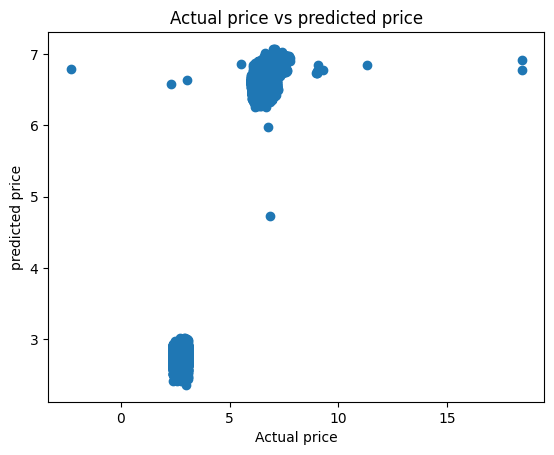

In [674]:
plt.scatter(y_train,training_data_pred)
plt.title("Actual price vs predicted price")
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.show()

In [675]:
test_data_pred=lr.predict(x_test)
error_score=mean_squared_error(y_test,test_data_pred)
print(error_score)

0.04384087654256482


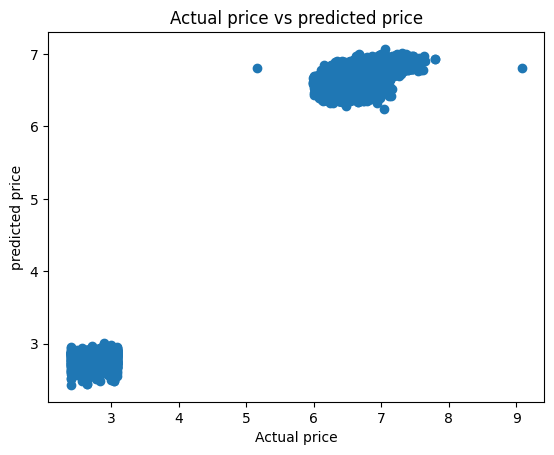

In [676]:
plt.scatter(y_test,test_data_pred)
plt.title("Actual price vs predicted price")
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.show()

In [677]:
rf=RandomForestRegressor(n_estimators=20,max_depth=4,random_state=42)
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))

0.8756863496588737
0.8855799393606376


In [678]:
gbr=GradientBoostingRegressor(n_estimators=10,learning_rate=0.1,random_state=42)
gbr.fit(x_train,y_train)
print(gbr.score(x_train,y_train))
print(gbr.score(x_test,y_test))

0.7644747606197463
0.7740793968432538


In [679]:
dtr=DecisionTreeRegressor()
param_grid={'max_depth':[2,5,10,20],
           'min_samples_split':[2,5,10],
           'min_samples_leaf':[1,2,4],
           'max_features':['auto','sqrt','log2']}

grid_search=GridSearchCV(estimator=dtr,param_grid=param_grid,cv=5)
grid_search.fit(x_train,y_train)
print('Best hyperparameters:',grid_search.best_params_)
best_model=grid_search.best_estimator_
y_pred=best_model.predict(x_test)

Best hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [680]:
metrics.mean_squared_error(y_test,y_pred)
metrics.mean_absolute_error(y_test,y_pred)
print(metrics.r2_score(y_test,y_pred))

0.9055875507887746


In [681]:
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = ss.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [1112.59182979]


In [682]:
import pickle
path='C:/Users/silam/OneDrive/Desktop/model/'
with open(path + 'model.pkl','wb') as file:
    pickle.dump(best_model,file)
with open (path + 'scaler.pkl','wb') as f:
    pickle.dump(ss,f)
with open(path + 't.pkl','wb') as f:
    pickle.dump(ohe,f)
with open(path + 's.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [ ]:
#DECISION TREE CLASSIFIER

In [683]:
df_2 = df.copy()


In [684]:
df_2 = df[df['status'].isin(['Won', 'Lost'])]
len(df_2)

150435

In [685]:
df_2.status.value_counts()

Won     116004
Lost     34431
Name: status, dtype: int64

In [686]:
df_2.value_counts()

id                                    item_date   quantity tons  customer    country  status  item type  application  thickness  width   material_ref                   product_ref  delivery date  selling_price
00019923-DFC4-4167-BDB9-0F522DE6E335  2021-01-24  117.189630     30157111.0  78.0     Won     W          41.0         1.00       1246.0  G9006                          611993       2021-04-01     999.00           1
AAB54F9F-79DA-4DBE-8A71-8799C341E10F  2020-12-10  59.510926      30201744.0  25.0     Lost    S          15.0         3.00       2020.0  unknown                        640665       2021-04-01     753.00           1
AAAF0B0A-D756-40A6-91AE-E877D7F4AC6E  2020-07-07  5.174390       30202645.0  32.0     Won     W          10.0         1.10       1500.0  77790077108US3LOR              1668701698   2020-07-01     688.00           1
AAAFB61B-C3B8-451C-AD77-B9E6D8E2422A  2020-09-08  8.553689       30229786.0  77.0     Lost    W          3.0          15.00      1500.0  unknown 

In [687]:
#x = df_2[['quantity_tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]

#y =df_2['status']

In [688]:
OE = OrdinalEncoder()
df_2.status = OE.fit_transform(df_2[['status']])
df_2['item type'] = OE.fit_transform(df_2[['item type']])

In [689]:
#x= np.concatenate((x[['quantity_tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]
#.values), axis=1)


In [690]:
X = df_2[['quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref']]
y = df_2['status']

In [691]:
#X = np.concatenate((X[['quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref']].values), axis=1)


In [692]:
ss.fit_transform(x)

array([[ 0.41506739, -0.87956189,  0.22814024, ..., -0.15323927,
         0.75215932, -0.00234649],
       [ 2.25042993,  0.8665426 , -0.75339772, ..., -0.15323927,
         0.75215932, -0.00234649],
       [ 1.77453529,  0.13430523, -1.55084831, ..., -0.15323927,
         0.75215932, -0.00234649],
       ...,
       [ 1.34669579,  0.8665426 , -0.56931035, ..., -0.15323927,
         0.75215932, -0.00234649],
       [-1.34846834,  0.8665426 , -0.88124292, ..., -0.15323927,
         0.75215932, -0.00234649],
       [ 1.81043496,  0.8665426 , -0.88124292, ..., -0.15323927,
         0.75215932, -0.00234649]])

In [693]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120348, 9)
(30087, 9)
(120348,)
(30087,)


In [694]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [695]:
dtc = DecisionTreeClassifier(max_depth = 5, random_state = 1)
dtc.fit(X_train, y_train)
train_score = dtc.score(X_train, y_train)
test_score = dtc.score(X_test, y_test)
print(train_score)
print(test_score)

0.8141888523282481
0.8147704988865623


In [696]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9251005417622229
0.8944062219563267


In [697]:
gbc = GradientBoostingClassifier(n_estimators = 30, learning_rate = 0.1,random_state = 28)
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
print(gbc.score(X_test, y_test))

0.819540000664739
0.8204872536311364


In [698]:
rfc = RandomForestClassifier(n_estimators = 20, max_depth =6,random_state = 35)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.8197809685246119
0.8201548841692425


In [699]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
print(LR.score(X_train, y_train))
print(LR.score(X_test, y_test))

0.771612324259647
0.7691694087147273


In [700]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)
xgb_model.score(X_train, y_train)

[01:33:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


0.6061815652265559

In [701]:
y_predict=xgb_model.predict(X_test)
mean_squared_error(y_test,y_predict)

0.07638293888123737

In [702]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [703]:
from sklearn.ensemble import ExtraTreesClassifier
clf=ExtraTreesClassifier(n_estimators=20,random_state=0)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

1.0
0.933027553428391


In [704]:
knn.predict(X_test)

array([0., 1., 1., ..., 0., 1., 0.])

In [705]:
y_pred=knn.predict(X_test)

In [706]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 5557,  1388],
       [ 1789, 21353]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual')

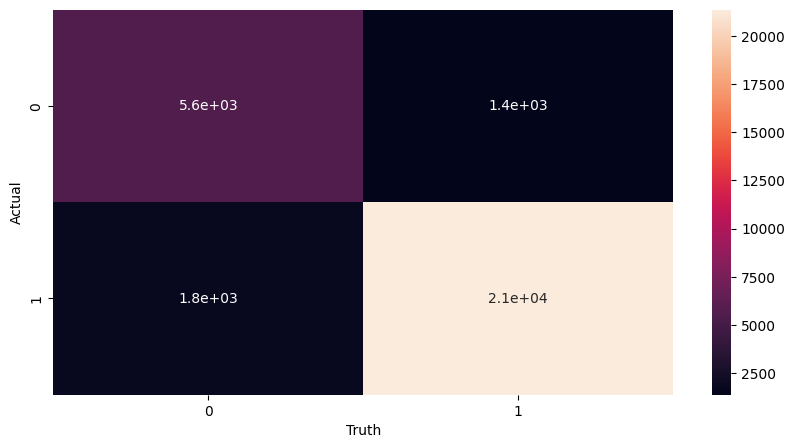

In [707]:
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Truth')
plt.ylabel('Actual')

In [708]:
from sklearn.metrics import accuracy_score, f1_score,classification_report, roc_curve, auc,ConfusionMatrixDisplay

In [709]:
accuracy_score(y_test,y_pred)
f1_score(y_test,y_pred,average='macro')

0.854225461327037

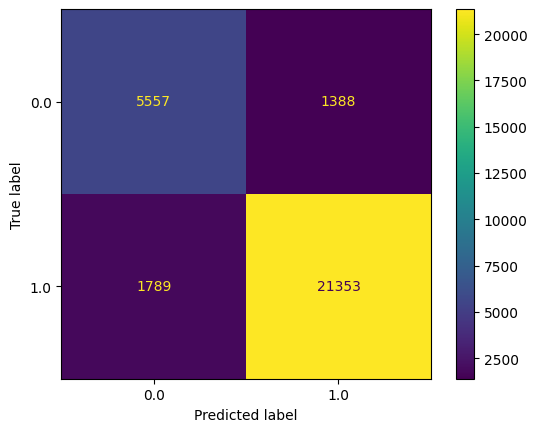

In [710]:
ConfusionMatrixDisplay.from_estimator(knn,X_test,y_test);

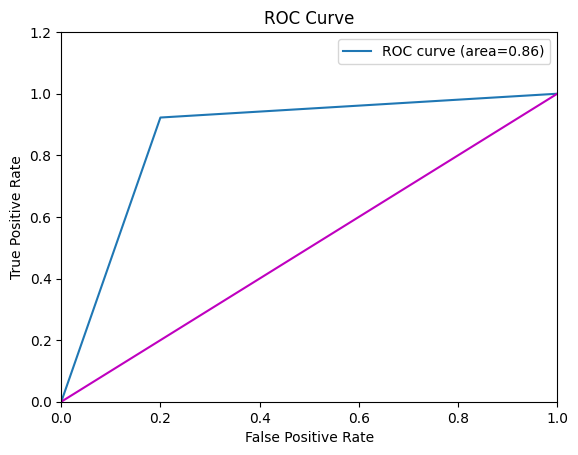

In [711]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label='ROC curve (area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],'m-')
plt.xlim([0.0,1])
plt.ylim([0.0,1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [712]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78      6945
         1.0       0.94      0.92      0.93     23142

    accuracy                           0.89     30087
   macro avg       0.85      0.86      0.85     30087
weighted avg       0.90      0.89      0.90     30087



In [713]:
# Saving the model
import pickle
path='C:/Users/silam/OneDrive/Desktop/model/'
with open(path + 'cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open(path  +'cscaler.pkl', 'wb') as f:
    pickle.dump(ss, f)
with open(path + 'ct.pkl', 'wb') as f:
    pickle.dump(OE, f)